# A3-Q4: Golf Driving Range

In [24]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
g = 9.81
k = 0.5

In [25]:
# Supplied functions
def Ground(d):
    '''
     h = Ground(d)
     
     Returns the height (in metres) of the ground at a horizontal distance
     d (metres) from the origin.
    '''
    return np.sin(d/3.) - 3.*np.sin(d/10.)

def GroundSlope(d):
    '''
     h = GroundSlope(d)
     
     Returns the slope of the ground at a horizontal distance
     d (metres) from the origin.
    '''
    return 1./3*np.cos(d/3) - 3./10*np.cos(d/10.)

## (a) MyOde

In [44]:

def MyOde(f, tspan, y0, h, event=(lambda t,y:1)):
    '''
     t,y = MyOde(f, tspan, y0, h, event=[])
    
     Numerically solves the initial value problem
    
        dy(t)/dt = f(t,y)
            y(0) = y0
    
     using the Modified Euler time-stepping method.
    
     Input
       f       a Python dynamics function with calling sequence
                  dydt = f(t, y)
       tspan   2-tuple giving the start and end times, [start, end]
       y0      initial state of the system (as a 1D vector)
       h       the time step to use (this is not adaptive time stepping)
       events  an event function with calling sequence
                  val = events(t, y)
               The computation stops as soon as a negative value is
               returned by the event function.
    
     Output
       t       1D vector holding time stamps
       y       an array that holds one state vector per row (corresponding
               to the time stamps)
    
       Notes:
           - t and y have the same number of rows.
    
           - The first element of t should be tspan[0], and the first
             row of y should be the initial state, y0.
             
           - The event function is NOT called until the second time step.
    
           - If the computation was stopped by the triggering of an event,
             then the last row of t and y should correspond to the
             time that linear interpolation indicates for the zero-crossing
             of the event-function.
    '''
    
    # Initialize output arrays, tlst and ylst
    t = tspan[0]
    y = deepcopy(y0)
    i = t
    
    tlst = []
    ylst = []
    
    tlst.append(t)
    ylst.append(list(y))

    # === YOUR CODE HERE ===
    xpos = y0[0]
    ypos = y0[1]
    xspeed = y0[2]
    yspeed = y0[3]
    
    while (i < tspan[1]):
        i += h
        xspeed_temp = xspeed + h * f(i, [xspeed,yspeed])[0]
        yspeed_temp = yspeed + h * f(i, [xspeed,yspeed])[1]
        xspeed = xspeed + (h/2)*(f(i, [xspeed,yspeed])[0]+f(i, [xspeed_temp,yspeed_temp])[0])
        yspeed = yspeed + (h/2)*(f(i, [xspeed,yspeed])[1]+f(i, [xspeed_temp,yspeed_temp])[1])
        xpos += xspeed
        ypos += yspeed
        if (event(i,[xpos,ypos,xspeed,yspeed]) < 0):
            break
        ylst.append(np.array([xpos,ypos,xspeed,yspeed]))
        tlst.append(i)
    
    # Return the time stamps, and corresponding solutions
    return tlst, np.array(ylst)

## (b) Dynamics Function: `projectile`

In [45]:
def projectile(t, z):
    dzdt = np.zeros_like(z)
    
    # === YOUR CODE HERE ===
    dzdt[0] = -k*z[0]
    dzdt[1] = -g-k*z[1]
    
    return dzdt

## (c) Events Function: `projectile_events`

In [46]:
def projectile_events(t, z):
    val = 1
    
    # === YOUR CODE HERE ===
    if (z[1] < Ground(z[0])):
        val = -1
    
    return val

## (d) Two flights

In [66]:
# Here is the code for one sample flight.
theta = 45
S = 70
tspan = [0, 30]
h = 0.05
theta_rad = theta/180.*np.pi
yStart = np.array([0, 0, S*np.cos(theta_rad), S*np.sin(theta_rad)])
t,y = MyOde(projectile, tspan, yStart, h, projectile_events)


In [74]:
perp_angle = (np.arctan(GroundSlope(y[len(y)-1][0]))+np.pi/2) % (2*np.pi)
speed = np.sqrt(np.square(y[len(y)-1][2])+np.square(y[len(y)-1][3]))
angle = np.arctan2(y[len(y)-1][3],y[len(y)-1][2])
rev_angle = (angle+np.pi)%(2*np.pi)
new_angle = perp_angle + (perp_angle-rev_angle)
yStart2 = np.array([y[len(y)-1][0], y[len(y)-1][1], speed*np.cos(new_angle), speed*np.sin(new_angle)])
t2,y2 = MyOde(projectile, tspan, yStart2, h, projectile_events)

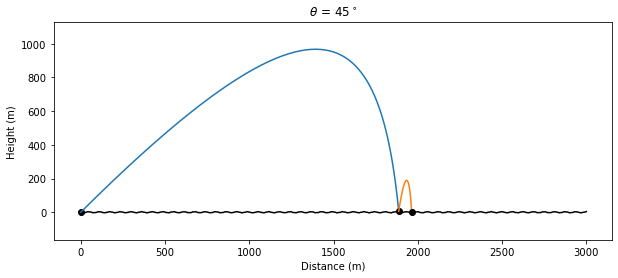

In [75]:
# Plot the ground
x = np.linspace(-10, 3000, 300)
hills = Ground(x)
plt.figure(figsize=[10,4])
plt.plot(x,hills, 'k')
plt.axis('equal')
plt.plot([0],[0], 'ko')   # Plot initial ball position
plt.plot(y[:,0], y[:,1])  # Plot ball trajectory
plt.plot(y[-1,0], y[-1,1], 'ko')  # Plot final ball position
plt.plot(y2[:,0], y2[:,1])  # Plot ball trajectory
plt.plot(y2[-1,0], y2[-1,1], 'ko')  # Plot final ball position
plt.title(r'$\theta$ = '+str(theta)+'$^\circ$');
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)');


## (e) Optimal $\theta$

Double-click to answer here.


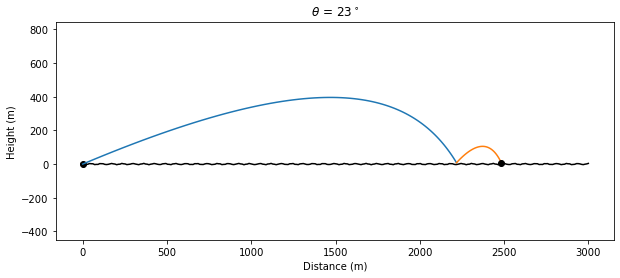

In [79]:
theta = 23
S = 70
tspan = [0, 30]
h = 0.05
theta_rad = theta/180.*np.pi
yStart = np.array([0, 0, S*np.cos(theta_rad), S*np.sin(theta_rad)])
t,y = MyOde(projectile, tspan, yStart, h, projectile_events)

perp_angle = (GroundSlope(y[len(y)-1][0])+np.pi/2) % (2*np.pi)
speed = np.sqrt(np.square(y[len(y)-1][2])+np.square(y[len(y)-1][3]))
#print(y[len(y)-1][2])
#print(y[len(y)-1][3])
#print(speed)
#print(GroundSlope(y[len(y)-1][0])/np.pi*180)
#print(perp_angle/np.pi*180)
angle = np.arctan2(y[len(y)-1][3],y[len(y)-1][2])
rev_angle = (angle+np.pi)%(2*np.pi)
new_angle = perp_angle + (perp_angle-rev_angle)
yStart2 = np.array([y[len(y)-1][0], y[len(y)-1][1], speed*np.cos(new_angle), speed*np.sin(new_angle)])
t2,y2 = MyOde(projectile, tspan, yStart2, h, projectile_events)

# Plot the ground
x = np.linspace(-10, 3000, 300)
hills = Ground(x)
plt.figure(figsize=[10,4])
plt.plot(x,hills, 'k')
plt.axis('equal')
plt.plot([0],[0], 'ko')   # Plot initial ball position
plt.plot(y[:,0], y[:,1])  # Plot ball trajectory
plt.plot(y2[:,0], y2[:,1])  # Plot ball trajectory 2
plt.plot(y2[-1,0], y2[-1,1], 'ko')  # Plot final ball position
plt.title(r'$\theta$ = '+str(theta)+'$^\circ$');
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)');